# Clustering Kemiskinan Jawa Barat

## 1. Import Library


In [61]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

import matplotlib.pyplot as plt


# 2. Import Dataset


In [62]:
df = pd.read_csv("dataset_jabar_kemiskinan.csv")

df.head()


,kode_kabupaten_kota,nama_kabupaten_kota,tahun,tpt,ppm,ppk,ikk,ipm
0,3201,KABUPATEN BOGOR,2020,14.29,7.69,10317,0.11,71.63
1,3202,KABUPATEN SUKABUMI,2020,9.60,7.09,8823,0.12,68.14
2,3203,KABUPATEN CIANJUR,2020,11.05,10.36,7980,0.27,66.96
3,3204,KABUPATEN BANDUNG,2020,8.58,6.91,10201,0.17,72.69
4,3205,KABUPATEN GARUT,2020,8.96,9.98,7876,0.15,67.20


In [63]:
df.columns


Index(['kode_kabupaten_kota', 'nama_kabupaten_kota', 'tahun', 'tpt', 'ppm',
       'ppk', 'ikk', 'ipm'],
      dtype='object')

# 3. Exploratory Data Analysis (EDA)

### 3.1 Informasi Dataset


In [64]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   kode_kabupaten_kota  81 non-null     int64  
 1   nama_kabupaten_kota  81 non-null     object 
 2   tahun                81 non-null     int64  
 3   tpt                  81 non-null     float64
 4   ppm                  81 non-null     float64
 5   ppk                  81 non-null     int64  
 6   ikk                  81 non-null     float64
 7   ipm                  81 non-null     float64
dtypes: float64(4), int64(3), object(1)
memory usage: 5.2+ KB


### 3.2 Statistik Deskriptif


In [65]:
df.describe()


,kode_kabupaten_kota,tahun,tpt,ppm,ppk,ikk,ipm
count,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000
mean,3231.333333,2021.000000,9.060741,8.682840,10874.419753,0.314444,72.931728
std,31.396258,0.821584,2.528681,2.815359,2269.175185,0.159484,4.370294
min,3201.000000,2020.000000,1.560000,2.450000,7829.000000,0.060000,66.960000
25%,3207.000000,2020.000000,7.720000,7.090000,9409.000000,0.200000,69.520000
50%,3214.000000,2021.000000,9.510000,8.830000,10476.000000,0.270000,72.310000
75%,3273.000000,2022.000000,10.880000,10.710000,11669.000000,0.410000,75.440000
max,3279.000000,2022.000000,14.290000,13.130000,17639.000000,0.770000,82.750000


### 3.3 Distribusi Data


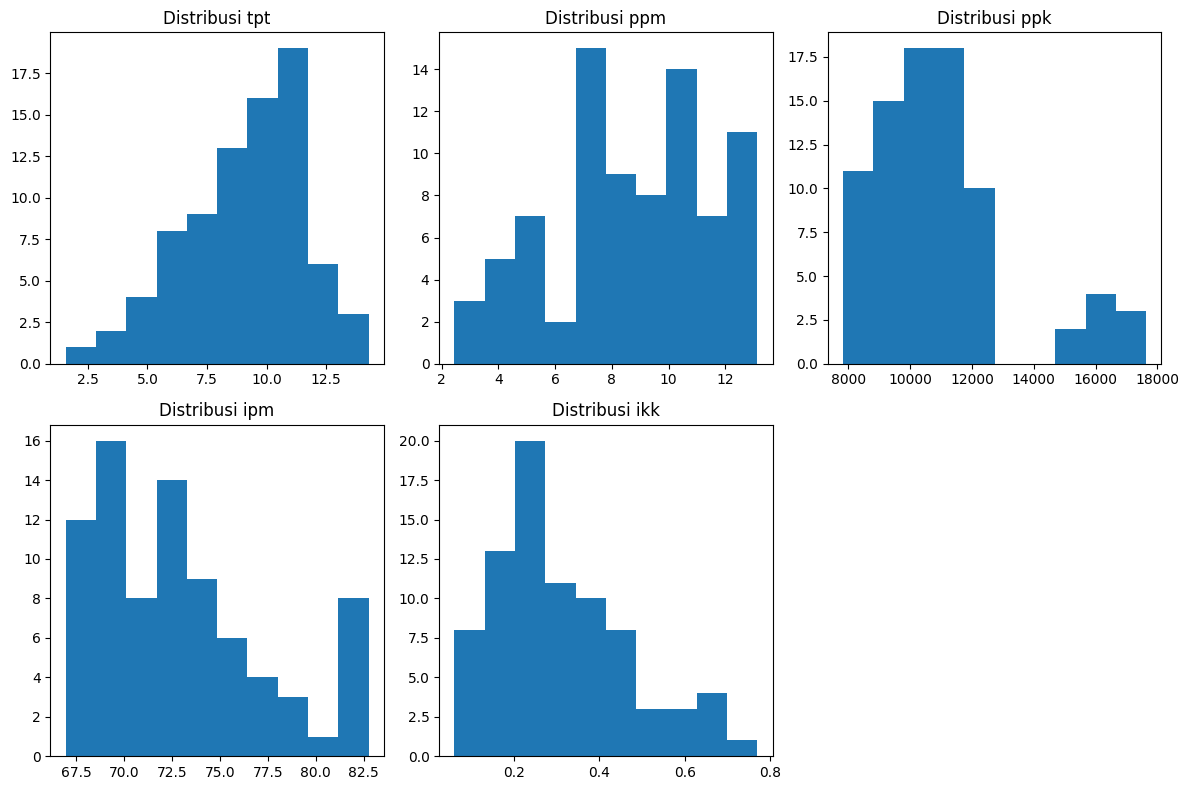

In [66]:
numerical_cols = ['tpt', 'ppm', 'ppk', 'ipm', 'ikk']

plt.figure(figsize=(12,8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    plt.hist(df[col], bins=10)
    plt.title(f'Distribusi {col}')

plt.tight_layout()
plt.show()


### 3.4 Korelasi Antar Variabel


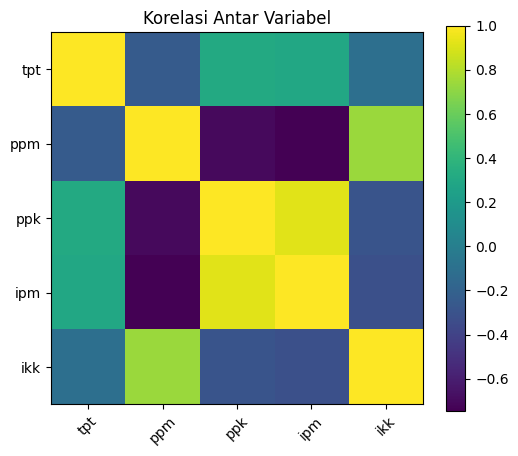

In [67]:
corr = df[numerical_cols].corr()

plt.figure(figsize=(6,5))
plt.imshow(corr)
plt.colorbar()
plt.xticks(range(len(numerical_cols)), numerical_cols, rotation=45)
plt.yticks(range(len(numerical_cols)), numerical_cols)
plt.title("Korelasi Antar Variabel")
plt.show()


# 4. Data Preparation

### 4.1 Seleksi Fitur


In [68]:
fitur = ['tpt', 'ppm', 'ppk', 'ikk', 'ipm']
X = df[fitur]


### 4.2 Standarisasi Data


In [69]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# 5. Modeling (K-Means Clustering)

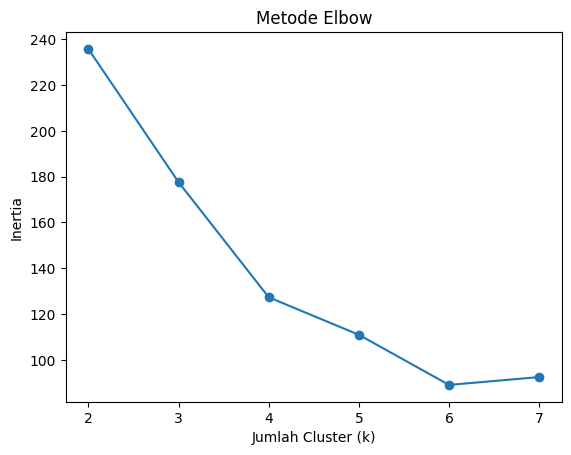

In [70]:
inertia = []

for k in range(2, 8):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure()
plt.plot(range(2, 8), inertia, marker='o')
plt.xlabel("Jumlah Cluster (k)")
plt.ylabel("Inertia")
plt.title("Metode Elbow")
plt.show()


### 5.2 Silhouette Score


In [71]:
for k in range(2, 6):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    print(f"k = {k}, silhouette = {score:.3f}")


k = 2, silhouette = 0.390
k = 3, silhouette = 0.283
k = 4, silhouette = 0.328
k = 5, silhouette = 0.289


### 5.3 Model K-Means Final


In [72]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)
df[['cluster']].head()


,cluster
0,0
1,0
2,2
3,0
4,2


### 5.4 Centroid Cluster


In [73]:
features = ['tpt', 'ppm', 'ppk', 'ipm', 'ikk']


In [74]:
centroids = scaler.inverse_transform(kmeans.cluster_centers_)

centroid_df = pd.DataFrame(
    centroids,
    columns=features
)

centroid_df


,tpt,ppm,ppk,ipm,ikk
0,9.774412,7.762353,10783.882353,0.255882,72.989706
1,10.596667,4.107500,15217.583333,0.156667,81.073333
2,7.840857,11.145714,9473.285714,0.425429,70.084000


### 5.5 Label Centroid


In [75]:
centroid_df['cluster'] = centroid_df.index
centroid_df['kategori'] = centroid_df['cluster'].map({
    0: 'Kemiskinan Tinggi',
    1: 'Kemiskinan Sedang',
    2: 'Kemiskinan Rendah'
})

centroid_df


,tpt,ppm,ppk,ipm,ikk,cluster,kategori
0,9.774412,7.762353,10783.882353,0.255882,72.989706,0,Kemiskinan Tinggi
1,10.596667,4.107500,15217.583333,0.156667,81.073333,1,Kemiskinan Sedang
2,7.840857,11.145714,9473.285714,0.425429,70.084000,2,Kemiskinan Rendah


# 6. Evaluasi dan Interpretasi

### 6.1 Profil Cluster


In [76]:
df.groupby('cluster')[features].mean()


,tpt,ppm,ppk,ipm,ikk
cluster,,,,,
0,9.774412,7.762353,10783.882353,72.989706,0.255882
1,10.596667,4.107500,15217.583333,81.073333,0.156667
2,7.840857,11.145714,9473.285714,70.084000,0.425429


### 6.2 Label Data


In [77]:
df['kategori_kemiskinan'] = df['cluster'].map({
    0: 'Kemiskinan Tinggi',
    1: 'Kemiskinan Sedang',
    2: 'Kemiskinan Rendah'
})


### 6.3 Visualisasi Cluster dan Centroid (PCA)


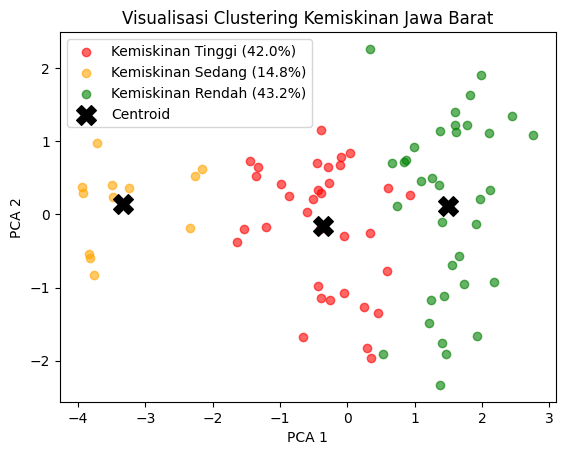

Persentase Klaster Kemiskinan:
kategori_kemiskinan
Kemiskinan Rendah    43.21
Kemiskinan Tinggi    41.98
Kemiskinan Sedang    14.81
Name: proportion, dtype: float64


In [ ]:
from uas import X_pca


jumlah = df['kategori_kemiskinan'].value_counts()
persentase = df['kategori_kemiskinan'].value_counts(normalize=True) * 100

warna = {
    'Kemiskinan Tinggi': 'red',
    'Kemiskinan Sedang': 'orange',
    'Kemiskinan Rendah': 'green'
}

for kategori, color in warna.items():
    idx = df['kategori_kemiskinan'] == kategori
    
    plt.scatter(
        X_pca[idx, 0],
        X_pca[idx, 1],
        c=color,
        alpha=0.6,
        label=f"{kategori} ({persentase[kategori]:.1f}%)"
    )

# Plot centroid
plt.scatter(
    centroids_pca[:, 0],
    centroids_pca[:, 1],
    c='black',
    marker='X',
    s=200,
    label='Centroid'
)

plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("Visualisasi Clustering Kemiskinan Jawa Barat")
plt.legend()
plt.show()

# (Opsional) tampilkan tabel persentase
print("Persentase Klaster Kemiskinan:")
print(persentase.round(2))

## 7. Evaluasi Akhir


In [79]:
silhouette = silhouette_score(X_scaled, df['cluster'])
print(f"silhouette_score : {silhouette}")


silhouette_score : 0.2829395737333797
